In [89]:
!pip install -r requirements.txt
!pip install numpy --upgrade


In [90]:
!pip install tenacity

In [91]:
from src.extraction.llm_extractor import LLMExtractor
from src.extraction.output_parser import LLMOutputParser
from src.extraction.extraction_template import template
from src.extraction.extraction_responses import LLMResponse
import numpy as np 

In [92]:
import os

results_path = "./results/llama_multimodal/test"
error_log_path = f"{results_path}/error_log.txt"
results_name = "results_gpt_4_1_llama_multimodal.json"

if not os.path.exists(results_path):
    os.makedirs(results_path)

In [93]:
model_mapping = {
    "gpt-4-nano" : "gpt-4.1-nano-2025-04-14",
    "gpt-4-mini" : "gpt-4o-mini-2024-07-18",
}

In [ ]:
from langchain_openai import ChatOpenAI
from core.settings import settings
# from src.llms.llama import LLama3_2_11B_V
llm = ChatOpenAI(
    model=model_mapping["gpt-4-mini"],
    temperature=0,
    openai_api_key="",
    max_retries=3
)

# llm_llama = LLama3_2_11B_V(temperature=1.5, top_p=0.9)

output_parser = LLMOutputParser(
    serializable=LLMResponse,
    llm=llm,
)


llm_extractor = LLMExtractor(
    llm=llm,
    output_parser=output_parser,
    extraction_template=template,
)

In [95]:
import pandas as pd

df = pd.read_pickle("./data/df_concat_with_text.pkl")

In [96]:
df.head()

,questionId,question,question_types,image,docId,ucsf_document_id,ucsf_document_page_no,answers,data_split,image_path,text,llm_tokens_count,text_length,words_count
0,337,what is the date mentioned in this letter?,"[handwritten, form]",documents/xnbl0037_1.png,279,xnbl0037,1,[1/8/93],train,./images/spdocvqa_images/xnbl0037_1.png,<Page 1> Confidential .. .. RJRT PR APPROVAL D...,112,389,39
1,338,what is the contact person name mentioned in l...,"[handwritten, form]",documents/xnbl0037_1.png,279,xnbl0037,1,"[P. Carter, p. carter]",train,./images/spdocvqa_images/xnbl0037_1.png,<Page 1> Confidential .. .. RJRT PR APPROVAL D...,112,389,39
2,339,Which corporation's letterhead is this?,[layout],documents/mxcj0037_1.png,280,mxcj0037,1,[Brown & Williamson Tobacco Corporation],train,./images/spdocvqa_images/mxcj0037_1.png,<Page 1> B&W BROWN & WILLIAMSON TOBACCO CORPOR...,451,2183,246
3,340,Who is in cc in this letter?,"[form, layout]",documents/mxcj0037_1.png,280,mxcj0037,1,[T.F. Riehl],train,./images/spdocvqa_images/mxcj0037_1.png,<Page 1> B&W BROWN & WILLIAMSON TOBACCO CORPOR...,451,2183,246
4,341,what is the subject of this letter?,"[form, layout]",documents/mxcj0037_1.png,280,mxcj0037,1,[Review of existing Brainstorming Ideas/483],train,./images/spdocvqa_images/mxcj0037_1.png,<Page 1> B&W BROWN & WILLIAMSON TOBACCO CORPOR...,451,2183,246


In [97]:
df_val = df[df["data_split"]== "val"].copy()

In [98]:
df_val

,questionId,question,question_types,image,docId,ucsf_document_id,ucsf_document_page_no,answers,data_split,image_path,text,llm_tokens_count,text_length,words_count
39463,49153,"What is the ‘actual’ value per 1000, during th...",[figure/diagram],documents/pybv0228_81.png,14465,pybv0228,81,[0.28],val,./images/spdocvqa_images/pybv0228_81.png,<Page 1> FIGURE C. 2. AGE ADJUSTED MOTOR VEHIC...,90,186,12
39464,24580,What is name of university?,[others],documents/nkbl0226_1.png,7027,nkbl0226,1,"[university of california, University of Calif...",val,./images/spdocvqa_images/nkbl0226_1.png,"<Page 1> UNIVERSITY OF CALIFORNIA, SAN DIEGO T...",78,278,30
39465,57349,What is the name of the company?,[layout],documents/snbx0223_22.png,4733,snbx0223,22,"[itc limited, ITC Limited]",val,./images/spdocvqa_images/snbx0223_22.png,<Page 1> ITC Limited REPORT AND ACCOUNTS 2013 ...,283,1253,153
39466,24581,Where is the university located ?,[others],documents/nkbl0226_1.png,7027,nkbl0226,1,"[san diego, San Diego]",val,./images/spdocvqa_images/nkbl0226_1.png,"<Page 1> UNIVERSITY OF CALIFORNIA, SAN DIEGO T...",78,278,30
39467,24582,To whom is the document sent?,"[handwritten, form]",documents/nkbl0226_1.png,7027,nkbl0226,1,[Paul],val,./images/spdocvqa_images/nkbl0226_1.png,"<Page 1> UNIVERSITY OF CALIFORNIA, SAN DIEGO T...",78,278,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44807,24564,who is the vice president and secretary ?,[table/list],documents/ntnk0226_15.png,7020,ntnk0226,15,"[Raymond C. Guth, Raymond c. Guth]",val,./images/spdocvqa_images/ntnk0226_15.png,<Page 1> AMSTAR'S SENIOR REPRESENTATIVES Rober...,144,635,49
44808,49146,What is the ‘title’ of the plot?,[layout],documents/pybv0228_81.png,14465,pybv0228,81,[Age adjusted motor vehicle accident mortality...,val,./images/spdocvqa_images/pybv0228_81.png,<Page 1> FIGURE C. 2. AGE ADJUSTED MOTOR VEHIC...,90,186,12
44809,49147,What is ‘figure C.2.’?,[layout],documents/pybv0228_81.png,14465,pybv0228,81,[age adjusted motor vehicle accident mortality...,val,./images/spdocvqa_images/pybv0228_81.png,<Page 1> FIGURE C. 2. AGE ADJUSTED MOTOR VEHIC...,90,186,12
44810,49150,What is the maximum value at x axis?,[figure/diagram],documents/pybv0228_81.png,14465,pybv0228,81,[1980],val,./images/spdocvqa_images/pybv0228_81.png,<Page 1> FIGURE C. 2. AGE ADJUSTED MOTOR VEHIC...,90,186,12


In [99]:
df_test = df[df["data_split"]== "test"].copy()

In [100]:

import os
async def extract_and_save(context,question, question_id, results_path=None):
    try:
        saving_path = f"{results_path}/{question_id}.json"
        if os.path.exists(saving_path):
            return
        result = await llm_extractor.aextract(
                    context=context,
                    question=question,
                )
        with open(f"{results_path}/{question_id}.json", "w") as f:
            f.write(result.model_dump_json())
    except Exception as e:
        with open(error_log_path, "a") as f:
            f.write(f"Error processing question {question_id}: {e}\n")
        print(f"Error processing question {question_id}: {e}")

In [101]:
import asyncio
from tqdm import tqdm


async def process_df(df, results_path=None):
    if not results_path:
        raise ValueError("results_path must be provided")
    tasks_list = []
    df = df.copy()
    df["extraction"] = None
    df["extraction_error"] = None
    for i, row in tqdm(df.iterrows(), total=len(df)):
        try:
            question_id = row["questionId"]
            question = row["question"]
            context = row["text"]
            tasks = asyncio.create_task(
                extract_and_save(
                    context=context,
                    question=question,
                    question_id=question_id,
                    results_path=results_path
                )
            )
            tasks_list.append(tasks)
            # await asyncio.sleep(0.1)
        except Exception as e:
            continue
    await asyncio.gather(*tasks_list)
            

In [102]:
df_test.head(5)

,questionId,question,question_types,image,docId,ucsf_document_id,ucsf_document_page_no,answers,data_split,image_path,text,llm_tokens_count,text_length,words_count
44812,57344,What is the dividend payout in 2012?,NaN,documents/rnbx0223_193.png,4720,rnbx0223,193,NaN,test,./images/spdocvqa_images/rnbx0223_193.png,<Page 1> ITC Limited . Report and Accounts 201...,352,960,78
44813,16384,What is the name of the person in the CC field ?,NaN,documents/lflm0081_1.png,5160,lflm0081,1,NaN,test,./images/spdocvqa_images/lflm0081_1.png,<Page 1> MEMORANDUM TO : W. C. Combs Product R...,107,443,52
44814,57346,What is the % of Employees in 2012 based on gr...,NaN,documents/rnbx0223_191.png,4753,rnbx0223,191,NaN,test,./images/spdocvqa_images/rnbx0223_191.png,<Page 1> FINANCIAL HIGHLIGHTS 40000 18000 3600...,445,1140,74
44815,61870,What is the personnel costs in the 4th year?,NaN,documents/hrfw0227_24.png,8103,hrfw0227,24,NaN,test,./images/spdocvqa_images/hrfw0227_24.png,<Page 1> SECTION II - PRIVILEGED COMMUNICATION...,495,1723,162
44816,57348,What is the % of 'Providers of Capital' in the...,NaN,documents/rnbx0223_191.png,4753,rnbx0223,191,NaN,test,./images/spdocvqa_images/rnbx0223_191.png,<Page 1> FINANCIAL HIGHLIGHTS 40000 18000 3600...,445,1140,74


In [103]:
# await process_df(df_test)

In [104]:
list_of_files = os.listdir(results_path)
len(list_of_files)

5189

In [105]:
import json

def format_results_from_path(results_path, name):
    list_of_files = os.listdir(results_path)
    list_of_results = []
    for file in list_of_files:
        try:
            if not file.endswith(".json"):
                continue
            with open(f"{results_path}/{file}", "r") as f:
                data = json.load(f)
            list_of_results.append({
                "questionId": int(file.split(".")[0]),
                "answer": data["answer"],
            }
            )
        except Exception as e:
            print(f"Error loading file {file}: {e}")
            raise e
    with open(name, "w") as f:
        json.dump(list_of_results, f, indent=4)
        

In [106]:
from src.extraction.llm_extractor import LLMExtractorMultimodal
from src.extraction.extraction_template import create_image_only_template

llm_extractor_multimodal = LLMExtractorMultimodal(
    llm=llm,
    output_parser=output_parser,
    extraction_template=template,
    image_template_func=create_image_only_template,
)

In [107]:
async def extract_and_save_multimodal(context,question, question_id, image_base64, results_path=None):
    try:
        saving_path = f"{results_path}/{question_id}.json"
        if os.path.exists(saving_path):
            return
        result = await llm_extractor_multimodal.aextract(
                    context=context,
                    question=question,
                    image=image_base64,
                )
        with open(f"{results_path}/{question_id}.json", "w") as f:
            f.write(result.model_dump_json())
    except Exception as e:
        with open(error_log_path, "a") as f:
            f.write(f"Error processing question {question_id}: {e}\n")

In [108]:
import cv2
import base64
async def process_df_multimodal(df, results_path=None):
    tasks_list = []
    df = df.copy()
    df["extraction"] = None
    df["extraction_error"] = None
    for i, row in tqdm(df.iterrows(), total=len(df)):
        try:
            question_id = row["questionId"]
            question = row["question"]
            context = row["text"]
            image_path = row["image_path"]
            saving_path = f"{results_path}/{question_id}.json"
            if os.path.exists(saving_path):
                continue
            image = cv2.imread(image_path)
            # encode the image as base64
            _, buffer = cv2.imencode('.jpg', image)
            image_base64 = base64.b64encode(buffer).decode('utf-8')
            tasks = asyncio.create_task(
                extract_and_save_multimodal(
                    context=context,
                    question=question,
                    question_id=question_id,
                    image_base64=image_base64,
                    results_path=results_path
                )
            )
            tasks_list.append(tasks)
            await asyncio.sleep(1
                                )
        except Exception as e:
            print(f"Error processing question {question_id}: {e}")
            continue
    return await asyncio.gather(*tasks_list)
    

In [109]:
# results= await process_df_multimodal(df_test)

In [110]:
async def extract_and_save_only_image(question, question_id, image_base64, results_path=None):
    try:
        saving_path = f"{results_path}/{question_id}.json"
        if os.path.exists(saving_path):
            return
        result = await llm_extractor_multimodal.aextract(
                    question=question,
                    image=image_base64,
                )
        with open(f"{results_path}/{question_id}.json", "w") as f:
            f.write(result.model_dump_json())
    except Exception as e:
        with open(error_log_path, "a") as f:
            f.write(f"Error processing question {question_id}: {e}\n")

In [111]:

async def process_df_only_image(df, results_path=None):
    tasks_list = []
    df = df.copy()
    df["extraction"] = None
    df["extraction_error"] = None
    for i, row in tqdm(df.iterrows(), total=len(df)):
        try:
            question_id = row["questionId"]
            question = row["question"]
            image_path = row["image_path"]
            saving_path = f"{results_path}/{question_id}.json"
            if os.path.exists(saving_path):
                continue
            image = cv2.imread(image_path)
            # encode the image as base64
            _, buffer = cv2.imencode('.jpg', image)
            image_base64 = base64.b64encode(buffer).decode('utf-8')
            tasks = asyncio.create_task(
                extract_and_save_only_image(
                    question=question,
                    question_id=question_id,
                    image_base64=image_base64,
                    results_path=results_path
                )
            )
            tasks_list.append(tasks)
            await asyncio.sleep(1
                                )
        except Exception as e:
            print(f"Error processing question {question_id}: {e}")
            continue
    return await asyncio.gather(*tasks_list)
    

In [112]:
def transform_local_path_to_drive_path(path: str):
  path = path.replace("./images/","../images/")
  return path

In [113]:
# df["image_path"] = df["image_path"].apply(transform_local_path_to_drive_path)

In [114]:
df.head()

,questionId,question,question_types,image,docId,ucsf_document_id,ucsf_document_page_no,answers,data_split,image_path,text,llm_tokens_count,text_length,words_count
0,337,what is the date mentioned in this letter?,"[handwritten, form]",documents/xnbl0037_1.png,279,xnbl0037,1,[1/8/93],train,./images/spdocvqa_images/xnbl0037_1.png,<Page 1> Confidential .. .. RJRT PR APPROVAL D...,112,389,39
1,338,what is the contact person name mentioned in l...,"[handwritten, form]",documents/xnbl0037_1.png,279,xnbl0037,1,"[P. Carter, p. carter]",train,./images/spdocvqa_images/xnbl0037_1.png,<Page 1> Confidential .. .. RJRT PR APPROVAL D...,112,389,39
2,339,Which corporation's letterhead is this?,[layout],documents/mxcj0037_1.png,280,mxcj0037,1,[Brown & Williamson Tobacco Corporation],train,./images/spdocvqa_images/mxcj0037_1.png,<Page 1> B&W BROWN & WILLIAMSON TOBACCO CORPOR...,451,2183,246
3,340,Who is in cc in this letter?,"[form, layout]",documents/mxcj0037_1.png,280,mxcj0037,1,[T.F. Riehl],train,./images/spdocvqa_images/mxcj0037_1.png,<Page 1> B&W BROWN & WILLIAMSON TOBACCO CORPOR...,451,2183,246
4,341,what is the subject of this letter?,"[form, layout]",documents/mxcj0037_1.png,280,mxcj0037,1,[Review of existing Brainstorming Ideas/483],train,./images/spdocvqa_images/mxcj0037_1.png,<Page 1> B&W BROWN & WILLIAMSON TOBACCO CORPOR...,451,2183,246


In [115]:
# df_test["image_path"] = df_test["image_path"].apply(transform_local_path_to_drive_path)

In [116]:
# from time import time
# start_time = time()
# for i in range(0, 10):
#     image = cv2.imread(df.iloc[i]["image_path"])
#                 # encode the image as base64
#     _, buffer = cv2.imencode('.jpg', image)
#     image_base64 = base64.b64encode(buffer).decode('utf-8')

#     llm_extractor_multimodal.extract(
#         df.iloc[0]["question"],
#         df.iloc[0]["text"],
#         image=image_base64,
#     )
# print(f"Time taken for 10 iterations: {time() - start_time} seconds")

In [ ]:
import cv2
import base64
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from time import time
import pandas as pd

def run_extraction_benchmark(df, llm_extractor_multimodal, n_iterations=10, n_runs=3):
    """
    Ejecuta el benchmark por triplicado y calcula estadísticas
    
    Parameters:
    df: DataFrame con los datos
    llm_extractor_multimodal: extractor LLM
    n_iterations: número de iteraciones por run
    n_runs: número de runs (triplicado = 3)
    
    Returns:
    dict con tiempos y estadísticas
    """
    
    all_times = []
    run_times = []
    
    print(f"Ejecutando {n_runs} runs de {n_iterations} iteraciones cada uno...")
    
    for run in range(n_runs):
        print(f"\nRun {run + 1}/{n_runs}")
        start_time = time()
        
        iteration_times = []
        
        for i in range(n_iterations):
            iter_start = time()
            
            # Cargar y procesar imagen
            image = cv2.imread(df.iloc[i]["image_path"])
            _, buffer = cv2.imencode('.jpg', image)
            image_base64 = base64.b64encode(buffer).decode('utf-8')
            
            # Extracción
            llm_extractor_multimodal.extract(
                df.iloc[0]["question"],
                df.iloc[0]["text"],
                image=image_base64,
            )
            
            iter_time = time() - iter_start
            iteration_times.append(iter_time)
            
            print(f"  Iteración {i+1}: {iter_time:.3f}s")
        
        total_run_time = time() - start_time
        run_times.append(total_run_time)
        all_times.extend(iteration_times)
        
        print(f"Run {run + 1} completado: {total_run_time:.3f}s total")
    
    # Calcular estadísticas
    stats = {
        'all_iteration_times': all_times,
        'run_times': run_times,
        'mean_time': np.mean(all_times),
        'std_time': np.std(all_times),
        'variance': np.var(all_times),
        'std_error': np.std(all_times) / np.sqrt(len(all_times)),
        'min_time': np.min(all_times),
        'max_time': np.max(all_times),
        'median_time': np.median(all_times)
    }
    
    return stats

def create_benchmark_boxplot(stats, title="Tiempo de Extracción - Análisis de Variabilidad"):
    """
    Crea un box plot con las estadísticas de tiempo
    """
    
    # Crear figura con estilo similar a tu imagen
    plt.figure(figsize=(10, 6))
    plt.style.use('default')
    plt.rcParams['axes.grid'] = True
    plt.rcParams['grid.alpha'] = 0.3
    
    # Crear box plot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    
    # Box plot de tiempos individuales
    box1 = ax1.boxplot([stats['all_iteration_times']], 
                       patch_artist=True,
                       labels=['Tiempo por Iteración'])
    
    # Colorear con el estilo púrpura
    box1['boxes'][0].set_facecolor('#8B4A9C')
    box1['boxes'][0].set_alpha(0.7)
    
    ax1.set_title('Distribución de Tiempos por Iteración', fontsize=12)
    ax1.set_ylabel('Tiempo (segundos)', fontsize=11)
    ax1.grid(True, alpha=0.3)
    
    # Box plot de tiempos por run
    box2 = ax2.boxplot([stats['run_times']], 
                       patch_artist=True,
                       labels=['Tiempo por Run'])
    
    box2['boxes'][0].set_facecolor('#6A3D7A')
    box2['boxes'][0].set_alpha(0.7)
    
    ax2.set_title('Distribución de Tiempos por Run', fontsize=12)
    ax2.set_ylabel('Tiempo (segundos)', fontsize=11)
    ax2.grid(True, alpha=0.3)
    
    # Título general
    fig.suptitle(title, fontsize=14, fontweight='normal')
    
    plt.tight_layout()
    plt.show()

def create_detailed_analysis_plot(stats):
    """
    Crea un análisis más detallado con múltiples visualizaciones
    """
    
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
    
    # 1. Histograma de tiempos
    ax1.hist(stats['all_iteration_times'], bins=15, alpha=0.7, color='#8B4A9C', edgecolor='black')
    ax1.axvline(stats['mean_time'], color='red', linestyle='--', linewidth=2, label=f'Media: {stats["mean_time"]:.3f}s')
    ax1.axvline(stats['median_time'], color='orange', linestyle='--', linewidth=2, label=f'Mediana: {stats["median_time"]:.3f}s')
    ax1.set_title('Distribución de Tiempos de Iteración')
    ax1.set_xlabel('Tiempo (segundos)')
    ax1.set_ylabel('Frecuencia')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # 2. Box plot detallado
    bp = ax2.boxplot([stats['all_iteration_times']], patch_artist=True)
    bp['boxes'][0].set_facecolor('#6A3D7A')
    bp['boxes'][0].set_alpha(0.7)
    ax2.set_title('Box Plot de Tiempos')
    ax2.set_ylabel('Tiempo (segundos)')
    ax2.set_xticklabels(['Iteraciones'])
    ax2.grid(True, alpha=0.3)
    
    # 3. Serie temporal
    ax3.plot(range(len(stats['all_iteration_times'])), stats['all_iteration_times'], 
             'o-', color='#4B2D58', alpha=0.7)
    ax3.axhline(stats['mean_time'], color='red', linestyle='--', alpha=0.8)
    ax3.fill_between(range(len(stats['all_iteration_times'])), 
                     stats['mean_time'] - stats['std_time'],
                     stats['mean_time'] + stats['std_time'], 
                     alpha=0.2, color='red', label='± 1 STD')
    ax3.set_title('Serie Temporal de Tiempos')
    ax3.set_xlabel('Iteración')
    ax3.set_ylabel('Tiempo (segundos)')
    ax3.legend()
    ax3.grid(True, alpha=0.3)
    
    # 4. Estadísticas textuales
    ax4.axis('off')
    stats_text = f"""
    ESTADÍSTICAS DESCRIPTIVAS
    
    Media: {stats['mean_time']:.4f} segundos
    Desviación Estándar: {stats['std_time']:.4f} segundos
    Varianza: {stats['variance']:.6f}
    Error Estándar: {stats['std_error']:.4f}
    
    Mínimo: {stats['min_time']:.4f} segundos
    Máximo: {stats['max_time']:.4f} segundos
    Mediana: {stats['median_time']:.4f} segundos
    
    Rango: {stats['max_time'] - stats['min_time']:.4f} segundos
    Coef. Variación: {(stats['std_time']/stats['mean_time']*100):.2f}%
    """
    
    ax4.text(0.1, 0.9, stats_text, transform=ax4.transAxes, fontsize=11,
             verticalalignment='top', bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.8))
    
    plt.tight_layout()
    plt.show()
    # save the figure
    fig.savefig(f"/detailed_analysis_plot.png", bbox_inches='tight', dpi=300)
    print(f"Gráfico detallado guardado en {results_path}/d

# Función principal para ejecutar todo
def run_complete_benchmark(df, llm_extractor_multimodal, n_iterations=10):
    """
    Ejecuta el benchmark completo y genera todas las visualizaciones
    """
    
    print("Iniciando benchmark por triplicado...")
    stats = run_extraction_benchmark(df, llm_extractor_multimodal, n_iterations, n_runs=3)
    
    print("\n" + "="*50)
    print("RESULTADOS DEL BENCHMARK")
    print("="*50)
    print(f"Total de iteraciones: {len(stats['all_iteration_times'])}")
    print(f"Tiempo promedio por iteración: {stats['mean_time']:.4f} ± {stats['std_error']:.4f} segundos")
    print(f"Desviación estándar: {stats['std_time']:.4f} segundos")
    print(f"Varianza: {stats['variance']:.6f}")
    print(f"Rango: {stats['min_time']:.4f} - {stats['max_time']:.4f} segundos")
    
    # Crear visualizaciones
    create_benchmark_boxplot(stats)
    create_detailed_analysis_plot(stats)
    
    return stats



Iniciando benchmark por triplicado...
Ejecutando 3 runs de 10 iteraciones cada uno...

Run 1/3


  2025-06-29 01:11:30,142 --[INFO] - httpx - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


  Iteración 1: 2.267s


  2025-06-29 01:11:33,009 --[INFO] - httpx - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


  Iteración 2: 2.867s


  2025-06-29 01:11:35,980 --[INFO] - httpx - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


  Iteración 3: 2.971s


  2025-06-29 01:11:38,639 --[INFO] - httpx - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


  Iteración 4: 2.658s


  2025-06-29 01:11:41,350 --[INFO] - httpx - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


  Iteración 5: 2.712s


  2025-06-29 01:11:43,409 --[INFO] - httpx - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


  Iteración 6: 2.059s


  2025-06-29 01:11:46,357 --[INFO] - httpx - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


  Iteración 7: 2.947s


  2025-06-29 01:11:48,062 --[INFO] - httpx - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


  Iteración 8: 1.706s


  2025-06-29 01:11:51,645 --[INFO] - httpx - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


  Iteración 9: 3.583s


  2025-06-29 01:11:53,864 --[INFO] - httpx - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


  Iteración 10: 2.219s
Run 1 completado: 25.989s total

Run 2/3


  2025-06-29 01:11:56,022 --[INFO] - httpx - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


  Iteración 1: 2.158s


  2025-06-29 01:11:58,812 --[INFO] - httpx - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


  Iteración 2: 2.790s


  2025-06-29 01:12:00,758 --[INFO] - httpx - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


  Iteración 3: 1.947s


  2025-06-29 01:12:02,989 --[INFO] - httpx - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


  Iteración 4: 2.230s


  2025-06-29 01:12:05,030 --[INFO] - httpx - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


  Iteración 5: 2.041s


  2025-06-29 01:12:07,620 --[INFO] - httpx - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


  Iteración 6: 2.590s


  2025-06-29 01:12:09,785 --[INFO] - httpx - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


  Iteración 7: 2.165s


  2025-06-29 01:12:11,814 --[INFO] - httpx - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


  Iteración 8: 2.029s


  2025-06-29 01:12:13,842 --[INFO] - httpx - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


  Iteración 9: 2.028s


  2025-06-29 01:12:15,812 --[INFO] - httpx - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


  Iteración 10: 1.970s
Run 2 completado: 21.948s total

Run 3/3


  2025-06-29 01:12:17,962 --[INFO] - httpx - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


  Iteración 1: 2.150s


  2025-06-29 01:12:19,804 --[INFO] - httpx - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


  Iteración 2: 1.843s


  2025-06-29 01:12:21,136 --[INFO] - httpx - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


  Iteración 3: 1.330s


  2025-06-29 01:12:22,979 --[INFO] - httpx - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


  Iteración 4: 1.844s


  2025-06-29 01:12:25,131 --[INFO] - httpx - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


  Iteración 5: 2.152s


  2025-06-29 01:12:26,770 --[INFO] - httpx - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


  Iteración 6: 1.638s


  2025-06-29 01:12:27,996 --[INFO] - httpx - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


  Iteración 7: 1.227s


  2025-06-29 01:12:29,430 --[INFO] - httpx - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


  Iteración 8: 1.434s


  2025-06-29 01:12:32,195 --[INFO] - httpx - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


  Iteración 9: 2.765s


  2025-06-29 01:12:34,755 --[INFO] - httpx - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


  Iteración 10: 2.560s
Run 3 completado: 18.943s total

RESULTADOS DEL BENCHMARK
Total de iteraciones: 30
Tiempo promedio por iteración: 2.2292 ± 0.0957 segundos
Desviación estándar: 0.5243 segundos
Varianza: 0.274864
Rango: 1.2272 - 3.5834 segundos


/tmp/ipykernel_184319/1353371876.py:90: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box1 = ax1.boxplot([stats['all_iteration_times']],
/tmp/ipykernel_184319/1353371876.py:103: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box2 = ax2.boxplot([stats['run_times']],


<Figure size 1000x600 with 0 Axes>

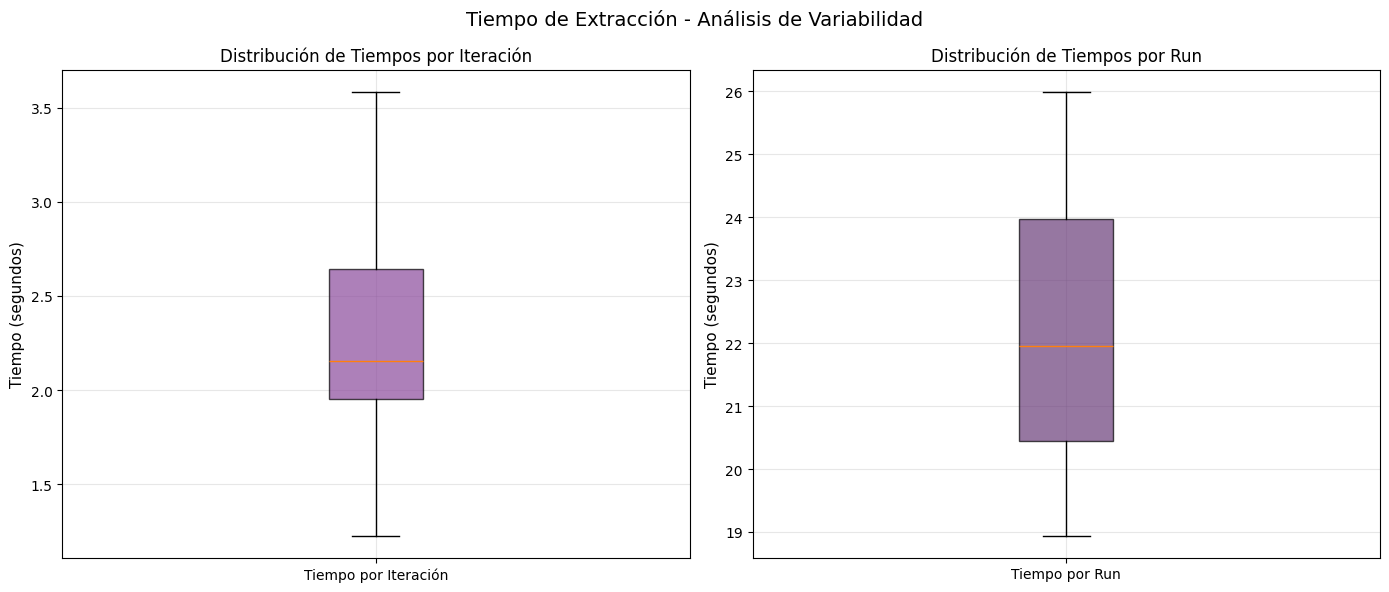

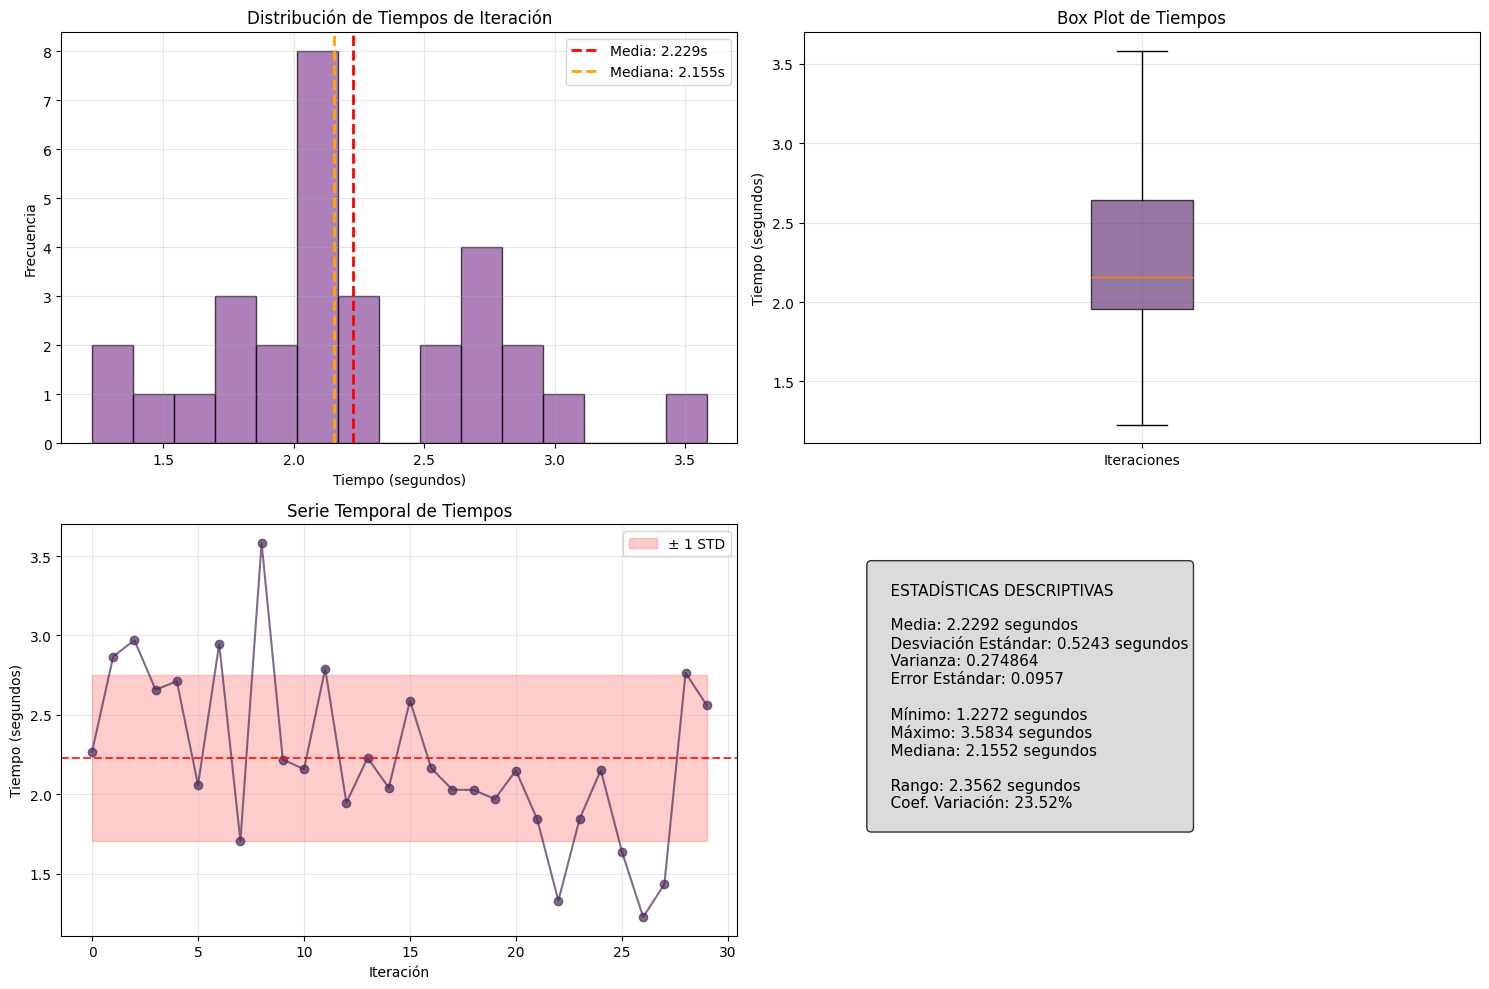

In [118]:
# Ejecutar el benchmark
stats = run_complete_benchmark(df, llm_extractor_multimodal, n_iterations=10)

In [29]:


def extract_and_save_multimodal_local(context,question, question_id, image_base64, results_path=None):
    try:
        saving_path = f"{results_path}/{question_id}.json"
        if os.path.exists(saving_path):
            return
        result = llm_extractor_multimodal.extract(
                    context=context,
                    question=question,
                    image=image_base64,
                )
        with open(f"{results_path}/{question_id}.json", "w") as f:
            f.write(result.model_dump_json())
    except Exception as e:
        with open(error_log_path, "a") as f:
            f.write(f"Error processing question {question_id}: {e}\n")
            
def extract_and_save_only_image_local(context,question, question_id, image_base64,results_path=None):
    try:
        saving_path = f"{results_path}/{question_id}.json"
        if os.path.exists(saving_path):
            return
        result = llm_extractor_multimodal.extract(
                    question=question,
                    image=image_base64,
                )
        with open(f"{results_path}/{question_id}.json", "w") as f:
            f.write(result.model_dump_json())
    except Exception as e:
        with open(error_log_path, "a") as f:
            f.write(f"Error processing question {question_id}: {e}\n")
            
def extract_and_save_local(context,question, question_id, image_base64=None, results_path=None):
    try:
        saving_path = f"{results_path}/{question_id}.json"
        if os.path.exists(saving_path):
            return
        result =llm_extractor_multimodal.extract(
                    context=context,
                    question=question,
                )
        with open(f"{results_path}/{question_id}.json", "w") as f:
            f.write(result.model_dump_json())
    except Exception as e:
        with open(error_log_path, "a") as f:
            f.write(f"Error processing question {question_id}: {e}\n")


def process_df_multimodal_local(df, results_path=None):
    if not results_path:
        raise ValueError("results_path must be provided")
    df = df.copy()
    df["extraction"] = None
    df["extraction_error"] = None
    for i, row in tqdm(df.iterrows(), total=len(df)):
        try:
            question_id = row["questionId"]
            question = row["question"]
            context = row["text"]
            image_path = row["image_path"]
            saving_path = f"{results_path}/{question_id}.json"
            if os.path.exists(saving_path):
                continue
            image = cv2.imread(image_path)
            # encode the image as base64
            _, buffer = cv2.imencode('.jpg', image)
            image_base64 = base64.b64encode(buffer).decode('utf-8')
            extract_and_save_multimodal_local(
                    context=context,
                    question=question,
                    question_id=question_id,
                    image_base64=image_base64,
                    results_path=results_path,
                )
        except Exception as e:
            print(f"Error processing question {question_id}: {e}")
            
            continue
    return df
    
    
def process_df_only_text_local(df,results_path=None):
    if not results_path:
        raise ValueError("results_path must be provided")
    df = df.copy()
    df["extraction"] = None
    df["extraction_error"] = None
    for i, row in tqdm(df.iterrows(), total=len(df)):
        try:
            question_id = row["questionId"]
            question = row["question"]
            context = row["text"]
            image_path = row["image_path"]
            saving_path = f"{results_path}/{question_id}.json"
            if os.path.exists(saving_path):
                continue
            extract_and_save_local(
                    context=context,
                    question=question,
                    question_id=question_id,
                    image_base64=None,
                )
        except Exception as e:
            print(f"Error processing question {question_id}: {e}")
            continue
    return df

def process_df_only_image_local(df,results_path=None):
    if not results_path:
        raise ValueError("results_path must be provided")
    df = df.copy()
    df["extraction"] = None
    df["extraction_error"] = None
    for i, row in tqdm(df.iterrows(), total=len(df)):
        try:
            question_id = row["questionId"]
            question = row["question"]
            context = row["text"]
            image_path = row["image_path"]
            saving_path = f"{results_path}/{question_id}.json"
            if os.path.exists(saving_path):
                continue
            image = cv2.imread(image_path)
            # encode the image as base64
            _, buffer = cv2.imencode('.jpg', image)
            image_base64 = base64.b64encode(buffer).decode('utf-8')
            extract_and_save_only_image(
                    question=question,
                    question_id=question_id,
                    image_base64=image_base64,
                )
        except Exception as e:
            print(f"Error processing question {question_id}: {e}")
            continue
    return df

In [30]:
def format_results_from_path_with_errors(results_path, name):
    list_of_files = os.listdir(results_path)
    list_of_results = []
    for file in list_of_files:
        try:
            if not file.endswith(".json"):
                continue
            with open(f"{results_path}/{file}", "r") as f:
                data = json.load(f)
            answer = data["answer"]
            if not answer:
                answer = data.get("unparsed_output")
            if not answer:
                answer= ""
            list_of_results.append({
                "questionId": int(file.split(".")[0]),
                "answer": answer,
            }
            )
        except Exception as e:
            print(f"Error loading file {file}: {e}")
            raise e
    with open(name, "w") as f:
        json.dump(list_of_results, f, indent=4)




In [31]:
async def process_experiment_async(base_name, process_df_func, df, data_type="test"):
    results_path = f"./results/{base_name}/{data_type}"
    results_name = f"results_{base_name}_{data_type}.json"
    if not os.path.exists(results_path):
        os.makedirs(results_path)
    results= await process_df_func(df, results_path=results_path)
    list_of_files = os.listdir(results_path)
    print(len(list_of_files))
    format_results_from_path_with_errors(results_path, results_name)

In [32]:
EXPERIMENTS_ASYNC = [
    {
        "base_name": "gpt-4-1-mini",
        "process_df_func": process_df,
        "df": df_val,
        "data_type": "val",
    },
    # gpt only images val
    { 
        "base_name": "gpt-4-1-mini-only-image",
        "process_df_func": process_df_only_image,
        "df": df_val,
        "data_type": "val",
    },
    # gpt multimodal val
    {
        "base_name": "gpt-4-1-mini-multimodal",
        "process_df_func": process_df_multimodal,
        "df": df_val,
        "data_type": "val",
    },
]

In [33]:
# await process_experiment_async(EXPERIMENTS_ASYNC[2]["base_name"],
#                         EXPERIMENTS_ASYNC[2]["process_df_func"],
#                         EXPERIMENTS_ASYNC[2]["df"].head(5),
#                         data_type=EXPERIMENTS_ASYNC[2]["data_type"])

for experiment in EXPERIMENTS_ASYNC:
    print("--"*20)
    print(f"Processing experiment: {experiment['base_name']}")
    print(f"Data type: {experiment['data_type']}")
    print(f"Processing function: {experiment['process_df_func'].__name__}")
    print("--"*20)
    await process_experiment_async(
        experiment["base_name"],
        experiment["process_df_func"],
        experiment["df"],
        data_type=experiment["data_type"]
    )

----------------------------------------
Processing experiment: gpt-4-1-mini
Data type: val
Processing function: process_df
----------------------------------------


100%|██████████| 5349/5349 [00:00<00:00, 18081.49it/s]


5349
----------------------------------------
Processing experiment: gpt-4-1-mini-only-image
Data type: val
Processing function: process_df_only_image
----------------------------------------


100%|██████████| 5349/5349 [00:00<00:00, 27059.57it/s]


5349
----------------------------------------
Processing experiment: gpt-4-1-mini-multimodal
Data type: val
Processing function: process_df_multimodal
----------------------------------------


 52%|█████▏    | 2785/5349 [00:00<00:00, 27845.11it/s]  2025-06-14 22:37:37,920 --[INFO] - httpx - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
  2025-06-14 22:37:38,311 --[INFO] - httpx - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
  2025-06-14 22:37:39,865 --[INFO] - httpx - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
  2025-06-14 22:37:40,015 --[INFO] - httpx - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
  2025-06-14 22:37:41,358 --[INFO] - httpx - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
  2025-06-14 22:37:43,555 --[INFO] - httpx - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
  2025-06-14 22:37:43,643 --[INFO] - httpx - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
  2025-06-14 22:37:44,800 --[INFO] - httpx - HTTP Request: POST https:/

5349


In [34]:



def process_experiment(base_name, process_df_func, df, data_type="test"):
    results_path = f"./results/{base_name}/{data_type}"
    results_name = f"results_{base_name}.json"
    if not os.path.exists(results_path):
        os.makedirs(results_path)
    process_df_func(df, results_path=results_path)
    list_of_files = os.listdir(results_path)
    print(len(list_of_files))
    format_results_from_path_with_errors(results_path, results_name)

In [35]:
EXPERIMENTS = [
    {
        "base_name": "llama_finetuned_multimodal_2_test",
        "process_df_func": process_df_multimodal_local,
        "df": df_test,
        "data_type": "test",
    },
    {
        "base_name": "llama_finetuned_text_only_2_test",
        "process_df_func": process_df_only_text_local,
        "df": df_test,
         "data_type": "test",
    },
    {
        "base_name": "llama_finetuned_image_only_2_test",
        "process_df_func": process_df_only_image_local,
        "df": df_test,
        "data_type": "test",
    },
    {
        "base_name": "llama_finetuned_multimodal_2_val",
        "process_df_func": process_df_multimodal_local,
        "df": df_val,
        "data_type": "val",
    },
    {
        "base_name": "llama_finetuned_text_only_2_val",
        "process_df_func": process_df_only_text_local,
        "df": df_val,
        "data_type": "val",
    },
    {
        "base_name": "llama_finetuned_image_only_2_val",
        "process_df_func": process_df_only_image_local,
        "df": df_val,
        "data_type": "val",
    },
]